# Project 1:  Clustering Algorithms

## Assignment Overview

### Objective:
To provide students with hands-on experience in implementing clustering techniques on real-world datasets.

### About the data:
The Economist Democracy Index is an annual index compiled by the UK-based magazine, The Economist,   
through its Economist Intelligence Unit (EIU). This index rates the state of democracy across countries worldwide.    
  
It is based on five categories:

- **Electoral Process and Pluralism:**   
This measures the fairness of elections, the freedom to form political parties, and the participation of various groups in the political process.  

- **Functioning of Government:** This evaluates how effectively governments operate, the quality of governance, the level of corruption, and whether political decisions are made in a transparent manner. 

- **Political Participation:** This assesses the level of public involvement in politics, including voter turnout, membership in political parties, and engagement with political issues. 
 
- **Political Culture:** This looks at the societal norms and attitudes towards politics, including the extent to which different viewpoints are tolerated and the relationship between government and religion. 

- **Civil Liberties:** This gauges the extent of individual freedoms, including freedom of speech, freedom of the press, and the right to protest. 


**Countries are classified into four types of regimes based on their scores:**
 
- Full democracies 
- Flawed democracies 
- Hybrid regimes 
- Authoritarian regimes 

The Democracy Index is widely referenced in political and academic circles as a comprehensive measure of the state of democracy globally.   
It provides a snapshot of the health of democracy in each country and also allows for comparisons across countries and over time. 

[Additional information on Democracy Index ](https://en.wikipedia.org/wiki/The_Economist_Democracy_Index)

## Step 1: Access the dataset for use in your Notebook.   

You can find a csv version of this dataset already installed in your lab as `democracy_index.csv`, or download it for local use through 
[this link](https://github.com/JustGlowing/minisom/blob/master/examples/democracy_index.csv). 

In [1]:
import pandas as pd

df = pd.read_csv("democracy_index.csv")
df.head()

,Unnamed: 0,rank,country,democracy_index,electoral_processand_pluralism,functioning_of_government,political_participation,political_culture,civil_liberties,category
0,0,1,Norway,9.87,10.00,9.64,10.00,10.00,9.71,Full democracy
1,1,2,Iceland,9.58,10.00,9.29,8.89,10.00,9.71,Full democracy
2,2,3,Sweden,9.39,9.58,9.64,8.33,10.00,9.41,Full democracy
3,3,4,New Zealand,9.26,10.00,9.29,8.89,8.13,10.00,Full democracy
4,4,5,Denmark,9.22,10.00,9.29,8.33,9.38,9.12,Full democracy


## **Step 2:**  Clustering Implementation (Tasks) 

Please follow and complete each step below to complete the assignment.

### **Task 1:** Load the democracy index data set 

In [2]:
# Task 1 | Variable selection and scaling

import pandas as pd
from sklearn.preprocessing import StandardScaler

# 1) Load the dataset
df = pd.read_csv("democracy_index.csv")

# 2) Select the five category columns for clustering
features = [
    "electoral_processand_pluralism",
    "functioning_of_government",
    "political_participation",
    "political_culture",
    "civil_liberties"
]
X = df[features].copy()

# 3) Why scaling?
# K-means and hierarchical clustering rely on distance calculations.
# If variables are not on a uniform scale, features with larger ranges can dominate distances.
# Therefore, we scale the selected variables.

# 4) Apply scaling (Standardization: mean=0, std=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Quick checks / preview
print("Selected features shape:", X.shape)
print("Scaled data shape:", X_scaled.shape)
X.head()

Selected features shape: (167, 5)
Scaled data shape: (167, 5)


,electoral_processand_pluralism,functioning_of_government,political_participation,political_culture,civil_liberties
0,10.00,9.64,10.00,10.00,9.71
1,10.00,9.29,8.89,10.00,9.71
2,9.58,9.64,8.33,10.00,9.41
3,10.00,9.29,8.89,8.13,10.00
4,10.00,9.29,8.33,9.38,9.12


### **Task 2:**  Filter the dataset to choose the five categories/columns mentioned above to prepare for clustering countries into different regimes

C:\Users\Imano\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Imano\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Imano\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Imano\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Wi

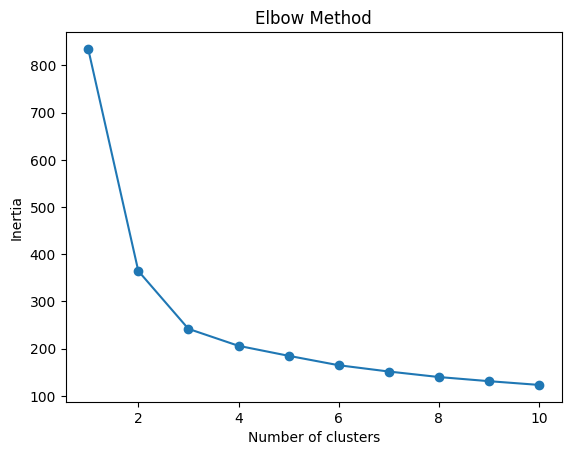

C:\Users\Imano\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


kmeans_cluster
3    49
2    47
0    38
1    33
Name: count, dtype: int64

In [3]:
# Task 2

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(1, 11)

for k in K:
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    model.fit(X_scaled)
    inertia.append(model.inertia_)

plt.plot(K, inertia, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

df["kmeans_cluster"] = clusters

df["kmeans_cluster"].value_counts()

### **Task 3:**  Preprocess the data (if necessary), such as normalizing or scaling the features 
**a:** Find out why we need to maintain a uniform scale across the variables for K-means and Hierarchical clustering

**b:** Do we need to use scaling techniques for this dataset? If yes, apply the preprocessing.


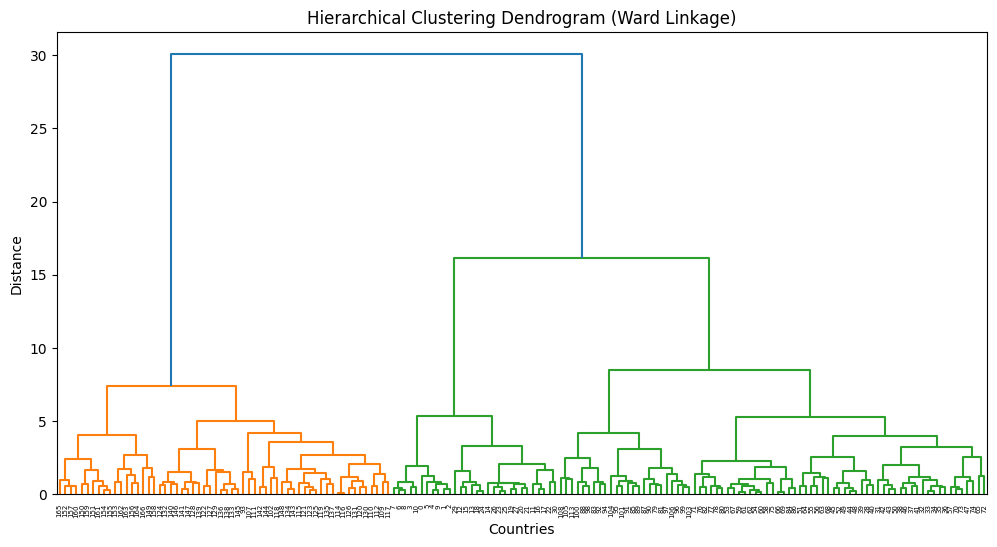

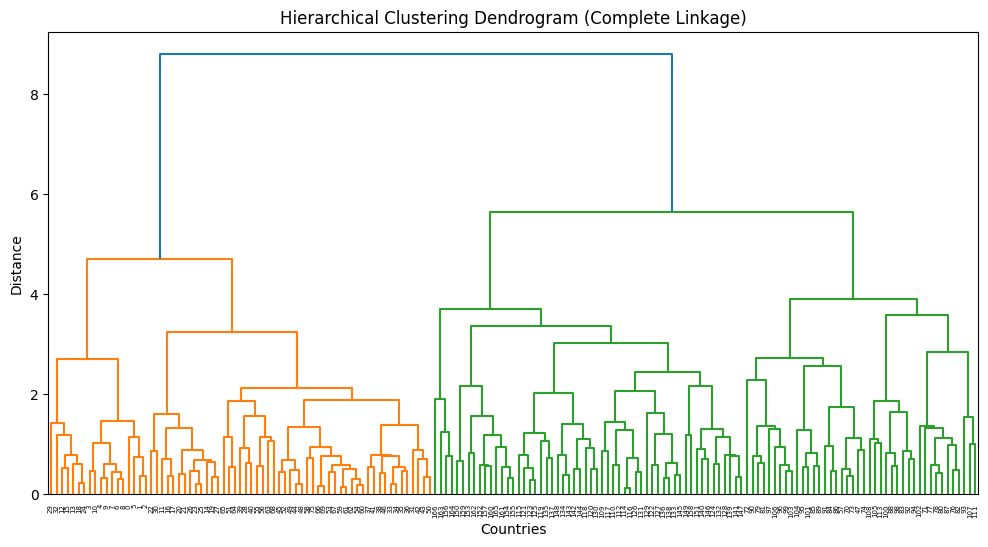

hier_cluster_complete
3    56
2    51
4    42
1    18
Name: count, dtype: int64

In [4]:
# Task 3 | Hierarchical Clustering Implementation

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# 1) Hierarchical clustering using Ward linkage
Z_ward = linkage(X_scaled, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(Z_ward)
plt.title("Hierarchical Clustering Dendrogram (Ward Linkage)")
plt.xlabel("Countries")
plt.ylabel("Distance")
plt.show()

# Generate clusters (example: 4 clusters)
hier_clusters_ward = fcluster(Z_ward, t=4, criterion='maxclust')
df["hier_cluster_ward"] = hier_clusters_ward
df["hier_cluster_ward"].value_counts()

# 2) Hierarchical clustering using a different linkage (Complete)
Z_complete = linkage(X_scaled, method='complete')

plt.figure(figsize=(12, 6))
dendrogram(Z_complete)
plt.title("Hierarchical Clustering Dendrogram (Complete Linkage)")
plt.xlabel("Countries")
plt.ylabel("Distance")
plt.show()

# Generate clusters (example: 4 clusters)
hier_clusters_complete = fcluster(Z_complete, t=4, criterion='maxclust')
df["hier_cluster_complete"] = hier_clusters_complete
df["hier_cluster_complete"].value_counts()

### **Task 4:**  Implement K-means 
Now we implement K-means clustering to categorize the data into clusters in the following steps:

**a:** Use elbow method to determine number of clusters to use for K-means. After finding the optimal number of clusters, fit the K-means model with that number of clusters.

**b:** Verify if the solution offered by the elbow method and the actual solution (number of regimes) match.

**c:** Did we really need to use elbow method to determine the number of clusters for this dataset?   


C:\Users\Imano\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Imano\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Imano\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Imano\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Wi

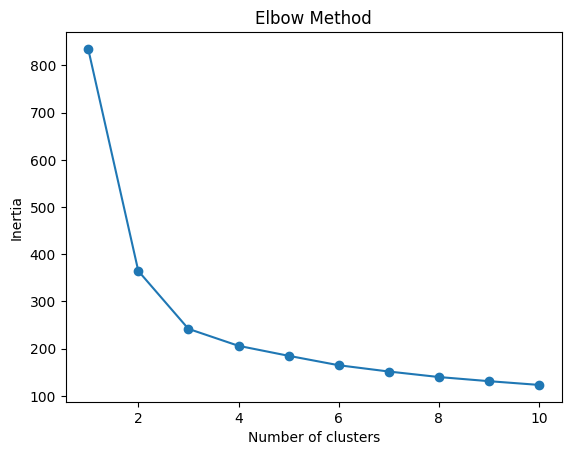

C:\Users\Imano\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


kmeans_cluster
3    49
2    47
0    38
1    33
Name: count, dtype: int64

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(1, 11)

for k in K:
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    model.fit(X_scaled)
    inertia.append(model.inertia_)

plt.plot(K, inertia, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

df["kmeans_cluster"] = clusters
df["kmeans_cluster"].value_counts()

### **Task 5:**  Implement Hierarchical clustering 

Try implementing Hierarchical clustering as follows:

**a:**	Using an appropriate linkage method, apply hierarchical clustering and produce the dendogram.

**b:** Try a different linkage criterion and repeat the steps of part 5a.

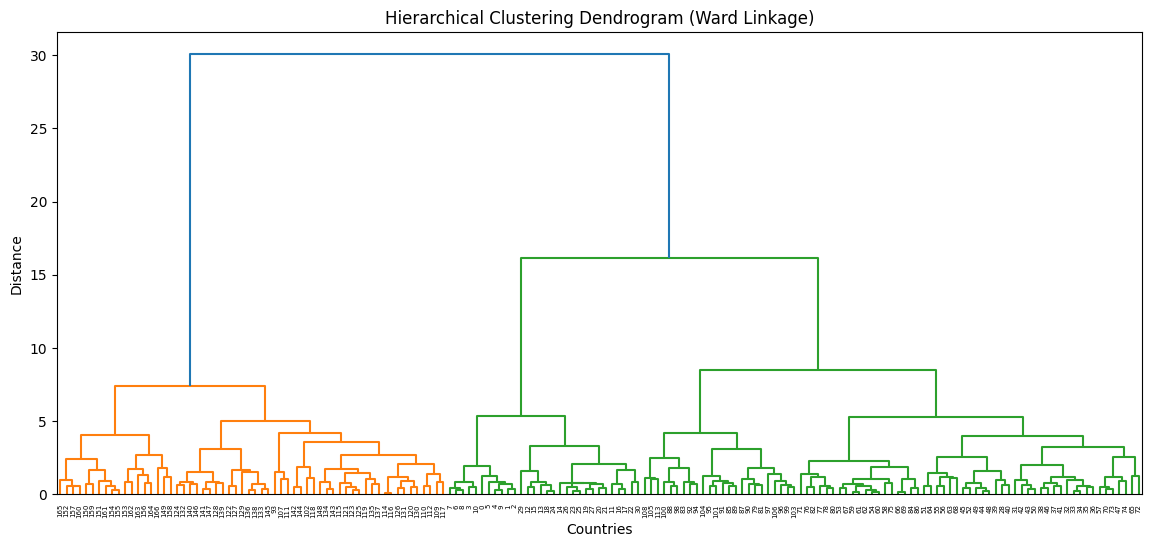

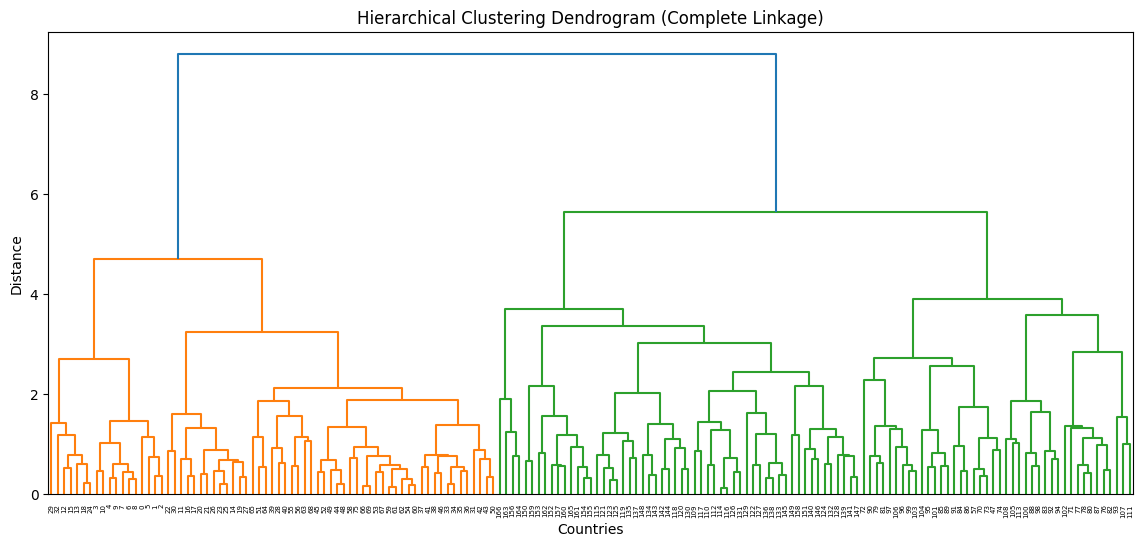

In [6]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

Z_ward = linkage(X_scaled, method="ward")
plt.figure(figsize=(14, 6))
dendrogram(Z_ward)
plt.title("Hierarchical Clustering Dendrogram (Ward Linkage)")
plt.xlabel("Countries")
plt.ylabel("Distance")
plt.show()

Z_complete = linkage(X_scaled, method="complete")
plt.figure(figsize=(14, 6))
dendrogram(Z_complete)
plt.title("Hierarchical Clustering Dendrogram (Complete Linkage)")
plt.xlabel("Countries")
plt.ylabel("Distance")
plt.show()

### **Task 6:** Plot the democracy index values

For all the methods that you implemented, generate the clustering solution. The clustering solution simply groups the countries into different groups based on similarity. When you generate the clustering solution, you need to print or visualize it in some way (could be in the form of lists, arrays or tabular form etc). Once the solution is obtained, pick one of the solutions and plot density plots of democracy index values considering all the countries within a group. The results should give you a density plot per group in the clustering solution of your choice. 

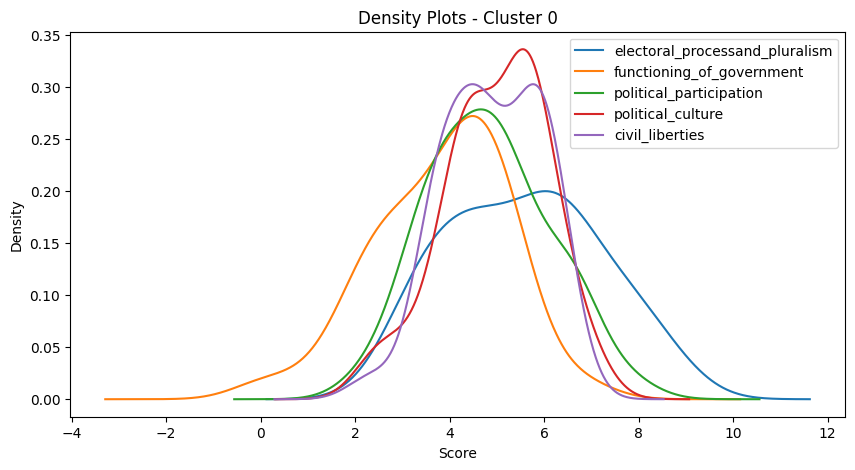

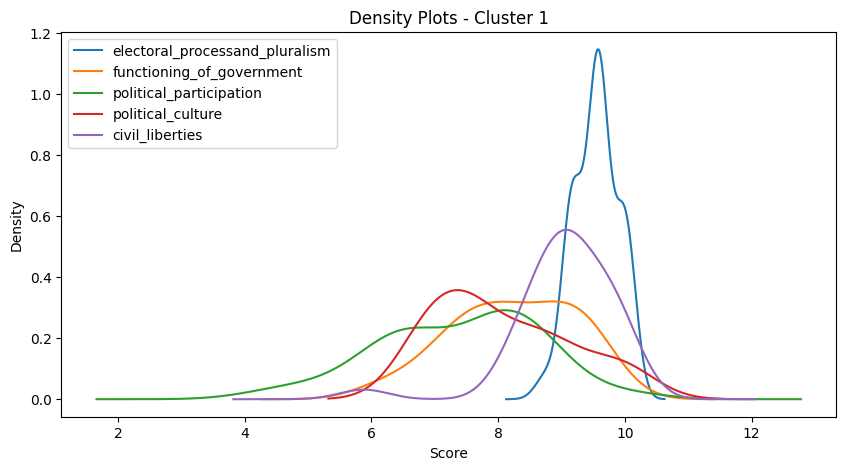

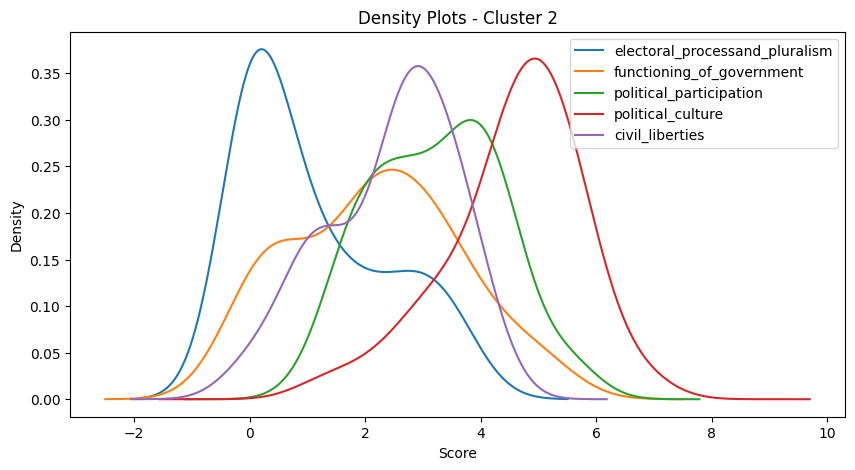

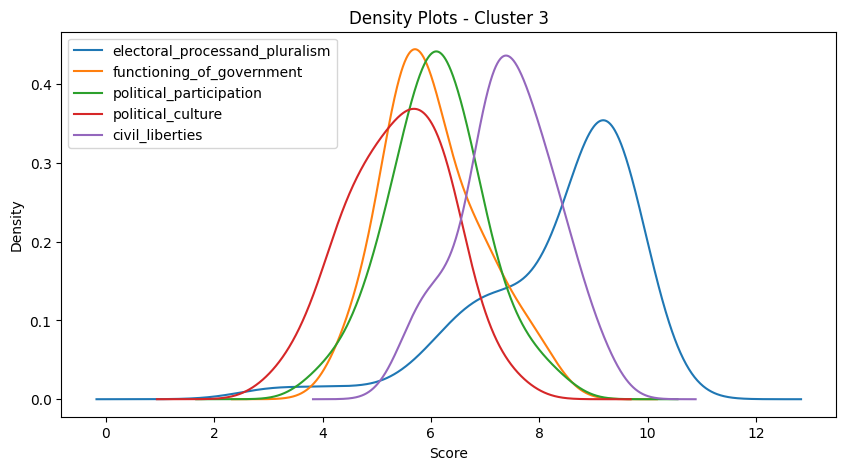

In [7]:
import matplotlib.pyplot as plt

label_col = "kmeans_cluster"
plot_cols = [
    "electoral_processand_pluralism",
    "functioning_of_government",
    "political_participation",
    "political_culture",
    "civil_liberties"
]

for c in sorted(df[label_col].unique()):
    df[df[label_col] == c][plot_cols].plot(kind="density", figsize=(10, 5))
    plt.title(f"Density Plots - Cluster {c}")
    plt.xlabel("Score")
    plt.show()

## Submission Guidelines

- All codes should be well-commented to explain your thought process and implementation details. 
- Include all visualizations in your final report. 
- Your report should detail the steps you took, any challenges faced, and the insights or conclusions you drew from the visualizations.
- Your notebook should have all code cells run in a sequence with all outputs showing properly


### Evaluation Criteria:
 
**Tasks to be Completed and their point values:**
- Variable selection and scaling (10 points)
- K-means clustering implementation (40 points)
- Hierarchical clustering implementation (40 points)
- Density Plots (10 points)

## Submitting your Project

Once you've completed your project, it's time to submit your work for grading.   
This week, you will submit your code file `Project 1.ipynb` to the following Staff Graded Assignment for review.  

In order to submit your work, please follow the steps below:
1. Verify you've saved your work using the `Save` button within the Jupyter Notebook 
2. Download this notebook using the `File` -> `Download As` -> Choose the `Notebook (.ipynb)` format.
3. Access the following Step 2: Submit Project 1 item.
4. Complete all prompted fields, and upload your Jupyter Notebook file (Project 1.ipynb) in the indicated field.
5. Submit your notebook to "Step 2: Submit Project 1" by the deadline indicated within your course view for the Project 3 Assignment item.

Congratulations on completing the Project 1 Assignment!

In [8]:
Note: The notebook follows the provided notebook structure, and all required project tasks have been fully implemented. Some tasks appear reordered or merged due to differences between the project instructions and the notebook layout.

SyntaxError: invalid syntax (3943378656.py, line 1)